In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [27]:
path='/home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-02-04-16-36-47/nu_sweep_0.5/data2022-02-04-16-36-46.h5'
df__1 = pd.read_hdf(path)
df_1=df__1.loc[df__1['nu']==0.5]

In [28]:
df_1

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,0.000000,0.000,4.952361,0.052277,2.616966,-0.012169,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
1,0.000000,1.034,4.527550,0.000085,2.616966,-0.012169,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
2,0.000000,2.068,4.457883,0.000083,2.616966,-0.012169,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
3,0.000000,3.102,4.424705,0.000080,2.616966,-0.012169,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
4,0.000000,4.136,4.322969,0.000078,2.616966,-0.012169,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.523599,201.630,5.638663,0.000574,2.437255,1.411560,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
196,0.523599,202.664,5.641964,0.000566,2.437255,1.411560,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
197,0.523599,203.698,5.645289,0.000555,2.437255,1.411560,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
198,0.523599,204.732,5.648609,0.000545,2.437255,1.411560,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34


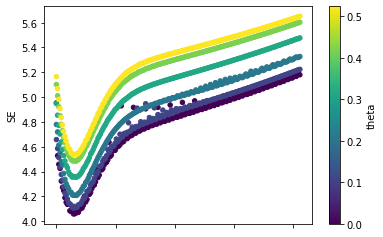

In [29]:
ax2 = df_1.plot( x='freq',y='SE', c='theta',colormap='viridis', sharex=True, kind='scatter')

In [30]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathchow
path=pathy+'/data/partial_s_sweep_2022-02-10-03-03-05/partial_s_sweep_0.2/data2022-02-10-03-02-47.h5'
df0 = pd.read_hdf(path)

In [31]:
df0

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,0.000000,0.000,4.726601,0.042283,2.616966,-0.012169,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.2_theta_0.0,10.34
1,0.000000,1.034,4.374201,0.000085,2.616966,-0.012169,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.2_theta_0.0,10.34
2,0.000000,2.068,4.306562,0.000083,2.616966,-0.012169,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.2_theta_0.0,10.34
3,0.000000,3.102,4.269281,0.000080,2.616966,-0.012169,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.2_theta_0.0,10.34
4,0.000000,4.136,4.178841,0.000078,2.616966,-0.012169,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.2_theta_0.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.523599,201.630,5.458469,0.000449,2.437255,1.411560,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.2_theta_30.0,10.34
196,0.523599,202.664,5.461627,0.000443,2.437255,1.411560,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.2_theta_30.0,10.34
197,0.523599,203.698,5.464805,0.000435,2.437255,1.411560,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.2_theta_30.0,10.34
198,0.523599,204.732,5.467981,0.000427,2.437255,1.411560,1.0,0.5,6000,618,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.2_theta_30.0,10.34


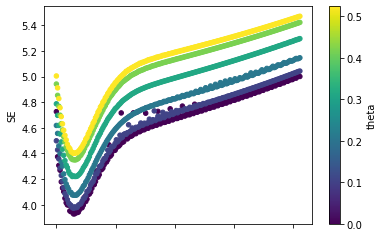

In [32]:
ax2 = df0.plot( x='freq',y='SE', c='theta',colormap='viridis', sharex=True, kind='scatter')

In [33]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathchow
path=pathy+'/data/partial_s_sweep_2022-02-10-16-03-02/partial_s_sweep_0.5/data2022-02-10-13-30-03.h5'
df1 = pd.read_hdf(path)

In [34]:
df1

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,0.000000,0.000,4.419067,0.039061,2.607302,-0.006953,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.5_theta_0.0,10.34
1,0.000000,1.034,4.137061,0.000066,2.607302,-0.006953,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.5_theta_0.0,10.34
2,0.000000,2.068,4.072373,0.000064,2.607302,-0.006953,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.5_theta_0.0,10.34
3,0.000000,3.102,4.027967,0.000062,2.607302,-0.006953,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.5_theta_0.0,10.34
4,0.000000,4.136,3.953470,0.000060,2.607302,-0.006953,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.5_theta_0.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.523599,201.630,5.164152,0.000280,2.421355,1.409822,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.5_theta_30.0,10.34
196,0.523599,202.664,5.166919,0.000276,2.421355,1.409822,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.5_theta_30.0,10.34
197,0.523599,203.698,5.169723,0.000271,2.421355,1.409822,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.5_theta_30.0,10.34
198,0.523599,204.732,5.172548,0.000268,2.421355,1.409822,1.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_part_diffpeak_p_0.5_theta_30.0,10.34


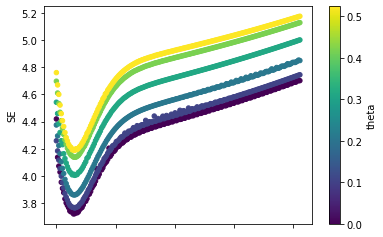

In [35]:
ax2 = df1.plot( x='freq',y='SE', c='theta',colormap='viridis', sharex=True, kind='scatter')

In [36]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathchow
path=pathy+'/data/partial_s_sweep_2022-02-10-16-03-02/partial_s_sweep_1.0/data2022-02-10-16-03-00.h5'
df2 = pd.read_hdf(path)

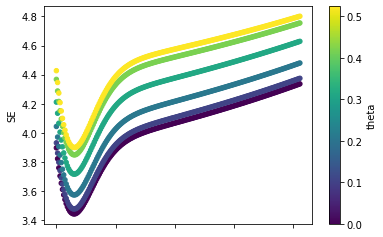

In [37]:
dfax2 = df2.plot( x='freq',y='SE', c='theta',colormap='viridis', sharex=True, kind='scatter')

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


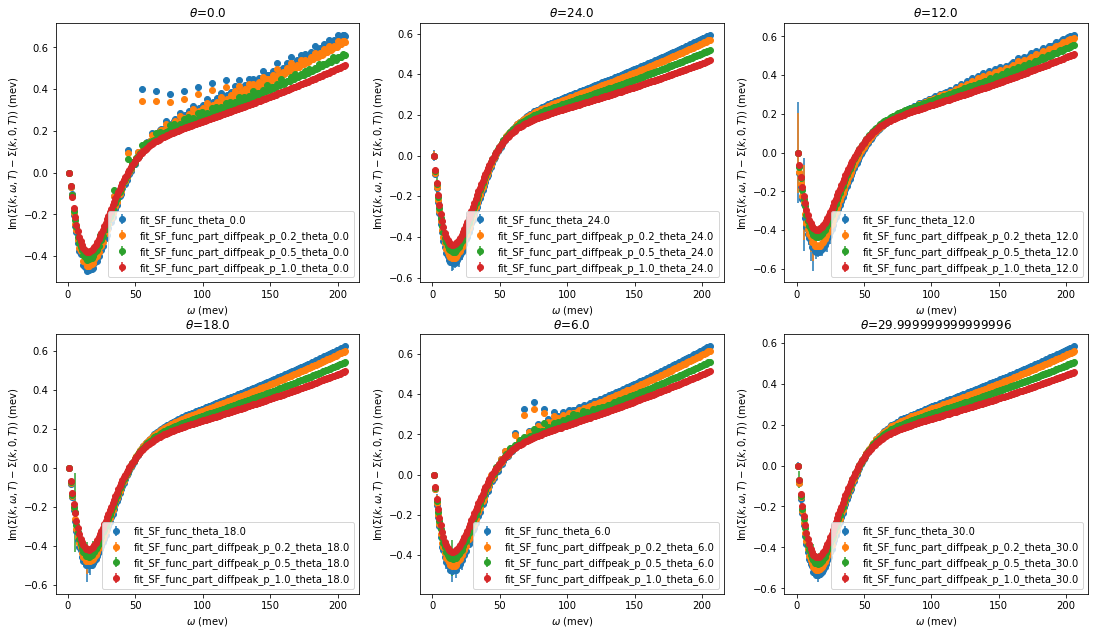

In [38]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df2['theta'].unique()
print(thets)
for l,th in enumerate(thets):
    df_12=df_1.loc[(df_1['theta'] ==th )&(df_1['nu'] >= 0.09)]
    df02=df0.loc[(df0['theta'] ==th )&(df0['nu'] >= 0.09)]
    df12=df1.loc[(df1['theta'] ==th )&(df1['nu'] >= 0.09)]
    df22=df2.loc[(df2['theta'] ==th )&(df2['nu'] >= 0.09)]
    nus=df2['nu'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for nu in nus:
        
        
        
        df_13=df_12.loc[(df_12['nu'] ==nu )&(df_12['nu'] >= 0.09)]
        df03=df02.loc[(df02['nu'] ==nu )&(df02['nu'] >= 0.09)]
        df13=df12.loc[(df12['nu'] ==nu )&(df12['nu'] >= 0.09)]
        df23=df22.loc[(df22['nu'] ==nu )&(df22['nu'] >= 0.09)]
        
        x=df_13['freq']
        y=df_13['SE']-df_13.iloc[0]['SE']
        if th ==0.0:
            y=df_13['SE']-df_13.iloc[1]['SE']
        if nu==0.5:
            y=df_13['SE']-df_13.iloc[1]['SE']
        err=df_13['error']

        axis[i,j].errorbar(x[1:],y[1:],err[1:],   label=df_13['SFname'][0], fmt='o')
        
        
        x=df03['freq']
        y=df03['SE']-df03.iloc[0]['SE']
        if th ==0.0:
            y=df03['SE']-df03.iloc[1]['SE']
        if nu==0.5:
            y=df03['SE']-df03.iloc[1]['SE']
        err=df03['error']

        axis[i,j].errorbar(x[1:],y[1:],err[1:],   label=df03['SFname'][0], fmt='o')
        
        x=df13['freq']
        y=df13['SE']-df13.iloc[0]['SE']
        if th ==0.0:
            y=df13['SE']-df13.iloc[1]['SE']
        if nu==0.5:
            y=df13['SE']-df13.iloc[1]['SE']
        err=df13['error']

        axis[i,j].errorbar(x[1:],y[1:],err[1:],   label=df13['SFname'][0], fmt='o')

        
        x=df23['freq']
        y=df23['SE']-df23.iloc[0]['SE']
        if th ==0.0:
            y=df23['SE']-df23.iloc[1]['SE']
        if nu==0.5:
            y=df23['SE']-df23.iloc[1]['SE']
        err=df23['error']

        axis[i,j].errorbar(x[1:],y[1:],err[1:],   label=df23['SFname'][0], fmt='o')
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\Sigma(k,\omega, T)-\Sigma(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


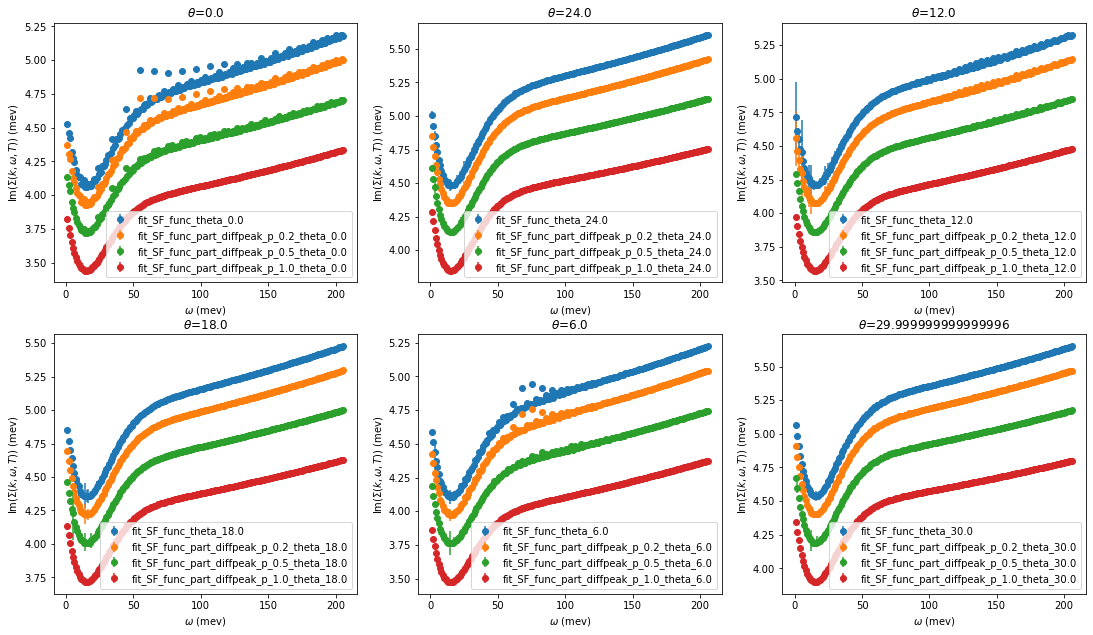

In [40]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df2['theta'].unique()
print(thets)
for l,th in enumerate(thets):
    df_12=df_1.loc[(df_1['theta'] ==th )&(df_1['nu'] >= 0.09)]
    df02=df0.loc[(df0['theta'] ==th )&(df0['nu'] >= 0.09)]
    df12=df1.loc[(df1['theta'] ==th )&(df1['nu'] >= 0.09)]
    df22=df2.loc[(df2['theta'] ==th )&(df2['nu'] >= 0.09)]
    nus=df2['nu'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for nu in nus:
        
        
        
        df_13=df_12.loc[(df_12['nu'] ==nu )&(df_12['nu'] >= 0.09)]
        df03=df02.loc[(df02['nu'] ==nu )&(df02['nu'] >= 0.09)]
        df13=df12.loc[(df12['nu'] ==nu )&(df12['nu'] >= 0.09)]
        df23=df22.loc[(df22['nu'] ==nu )&(df22['nu'] >= 0.09)]
        
        x=df_13['freq']
        y=df_13['SE']-df_13.iloc[0]['SE']
        if th ==0.0:
            y=df_13['SE']#-df_13.iloc[1]['SE']
        if nu==0.5:
            y=df_13['SE']#-df_13.iloc[1]['SE']
        err=df_13['error']

        axis[i,j].errorbar(x[1:],y[1:],err[1:],   label=df_13['SFname'][0], fmt='o')
        
        
        x=df03['freq']
        y=df03['SE']-df03.iloc[0]['SE']
        if th ==0.0:
            y=df03['SE']#-df03.iloc[1]['SE']
        if nu==0.5:
            y=df03['SE']#-df03.iloc[1]['SE']
        err=df03['error']

        axis[i,j].errorbar(x[1:],y[1:],err[1:],   label=df03['SFname'][0], fmt='o')
        
        x=df13['freq']
        y=df13['SE']-df13.iloc[0]['SE']
        if th ==0.0:
            y=df13['SE']#-df13.iloc[1]['SE']
        if nu==0.5:
            y=df13['SE']#-df13.iloc[1]['SE']
        err=df13['error']

        axis[i,j].errorbar(x[1:],y[1:],err[1:],   label=df13['SFname'][0], fmt='o')

        
        x=df23['freq']
        y=df23['SE']-df23.iloc[0]['SE']
        if th ==0.0:
            y=df23['SE']#-df23.iloc[1]['SE']
        if nu==0.5:
            y=df23['SE']#-df23.iloc[1]['SE']
        err=df23['error']

        axis[i,j].errorbar(x[1:],y[1:],err[1:],   label=df23['SFname'][0], fmt='o')
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\Sigma(k,\omega, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()